In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

In [2]:
df_houses = pd.read_pickle("houses_dataframe_cleaned.pkl")

In [3]:
df_houses.head()

,address,zipcode,sale_price,beds,baths,house_sqft,lotsize,year_built
0,2934 South Bellaire Street,80222,463500,2,1,725,7150,1949
1,1885 West Stoll Place,80221,500000,2,1,987,5720,1947
2,5179 Clay Street,80221,540000,2,2,1045,6250,1941
3,1115 Cook Street,80206,775000,3,2,1893,4459,1910
4,3318 Gilpin Street,80205,756500,3,2,2450,3390,1890


In [4]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1006 entries, 0 to 1100
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   address     1006 non-null   object
 1   zipcode     1006 non-null   object
 2   sale_price  1006 non-null   int64 
 3   beds        1006 non-null   int64 
 4   baths       1006 non-null   int64 
 5   house_sqft  1006 non-null   int64 
 6   lotsize     1006 non-null   int64 
 7   year_built  1006 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 70.7+ KB


In [5]:
df_houses.zipcode.unique()

array(['80222', '80221', '80206', '80205', '80210', '80219', '80204',
       '80211', '80212', '80220', '80249', '80223', '80209', '80207',
       '80260', '80230', '80246', '80224', '80237', '80231', '80247',
       '80110', '80236', '80238', '80203', '80218', '80239', '80229',
       '80235'], dtype=object)

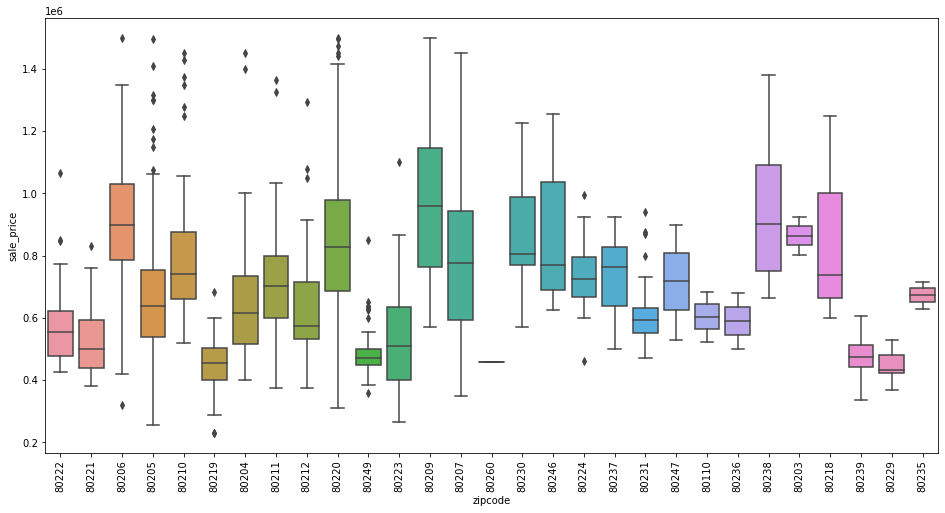

In [6]:
# Investigate sale price distribution amongst different zipcodes

plt.figure(figsize=(16,8))
sns.boxplot(x=df_houses["zipcode"], y=df_houses["sale_price"])
plt.xticks(rotation = 90);

In [7]:
df_houses.describe()

,sale_price,beds,baths,house_sqft,lotsize,year_built
count,1.006000e+03,1006.000000,1006.000000,1006.000000,1006.000000,1006.000000
mean,7.034230e+05,3.242545,2.269384,2000.779324,5981.924453,1941.526839
std,2.471501e+05,0.908128,0.916405,810.464704,2337.785910,34.992832
min,2.300000e+05,1.000000,1.000000,549.000000,1177.000000,1880.000000
25%,5.200000e+05,3.000000,2.000000,1420.000000,4621.250000,1914.000000
50%,6.555000e+05,3.000000,2.000000,1887.000000,6098.000000,1942.000000
75%,8.250000e+05,4.000000,3.000000,2455.750000,6630.000000,1955.750000
max,1.500000e+06,6.000000,5.000000,5186.000000,22811.000000,2021.000000


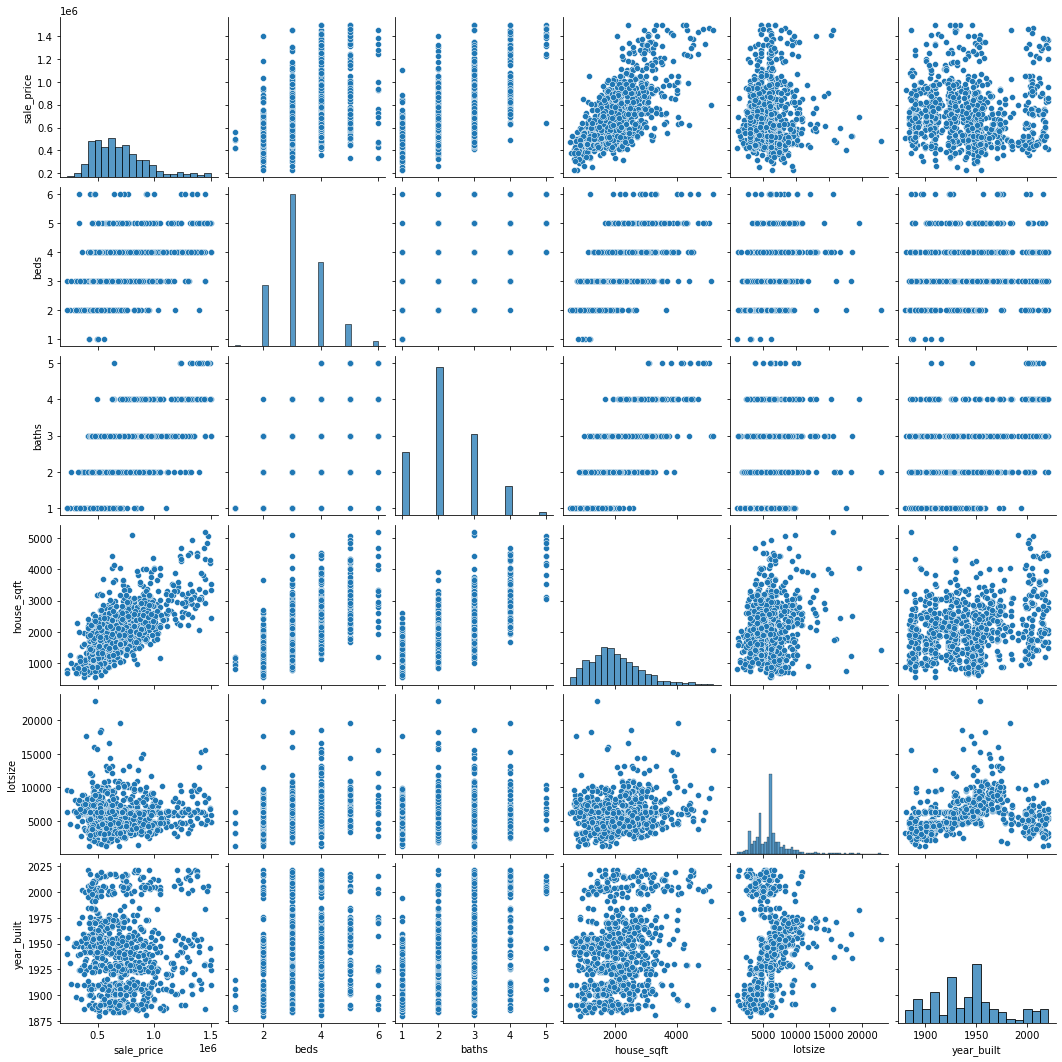

In [8]:
# Explore feature/target relationships, looking for linear relationships

sns.pairplot(df_houses);

In [9]:
df_houses.corr()

,sale_price,beds,baths,house_sqft,lotsize,year_built
sale_price,1.000000,0.437073,0.602730,0.698538,-0.003547,-0.058505
beds,0.437073,1.000000,0.581403,0.644760,0.245780,0.167470
baths,0.602730,0.581403,1.000000,0.742547,0.068609,0.366738
house_sqft,0.698538,0.644760,0.742547,1.000000,0.182305,0.241946
lotsize,-0.003547,0.245780,0.068609,0.182305,1.000000,0.215669
year_built,-0.058505,0.167470,0.366738,0.241946,0.215669,1.000000


In [10]:
# Split X and y into features and target

X, y = df_houses[["beds","baths","house_sqft","lotsize","year_built"]], df_houses["sale_price"]

In [11]:
# Function to compare baseline modeling metrics between simple lineear regression, Ridge and Lasso

def model_compare(X,y):
    
    X, x_test, y, y_test = train_test_split(X, y, test_size = .2, random_state = 10)
    
    lm = LinearRegression()
    print(f"Simple cv r^2: {cross_val_score(lm, X, y, cv = 5, scoring = 'r2')}")
    print(f"Simple cv mean r^2: {np.mean(cross_val_score(lm, X, y, cv = 5, scoring = 'r2'))}")
    
    lm.fit(X, y)
    preds = lm.predict(X)
    print(f"Simple cv MAE: {mean_absolute_error(y, preds)}\n")
    
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    lm_ridge = Ridge(alpha = 1)
    print(f"Ridge cv r^2: {cross_val_score(lm_ridge, X_scaled, y, cv = 5, scoring = 'r2')}")
    print(f"Ridge cv mean r^2: {np.mean(cross_val_score(lm_ridge, X, y, cv = 5, scoring = 'r2'))}")
    
    lm_ridge.fit(X_scaled, y)
    preds = lm_ridge.predict(X_scaled)
    print(f"Ridge cv MAE: {mean_absolute_error(y, preds)}\n")
        
    lm_lasso = Lasso(alpha = 100)
    print(f"Lasso cv r^2: {cross_val_score(lm_lasso, X_scaled, y, cv = 5, scoring = 'r2')}")
    print(f"Lasso cv mean r^2: {np.mean(cross_val_score(lm_lasso, X, y, cv = 5, scoring = 'r2'))}")
    
    lm_lasso.fit(X_scaled, y)
    preds = lm_lasso.predict(X_scaled)
    print(f"Lasso cv MAE: {mean_absolute_error(y, preds)}")

In [12]:
# All 3 models metrics very close, we'll stick with linear regression due to limited number of features already
model_compare(X,y)

Simple cv r^2: [0.65703142 0.43902485 0.65413202 0.59826339 0.57175364]
Simple cv mean r^2: 0.5840410646885023
Simple cv MAE: 114048.30065134302

Ridge cv r^2: [0.6567055  0.439527   0.65410277 0.59819464 0.57199193]
Ridge cv mean r^2: 0.584073007157924
Ridge cv MAE: 114041.46982374205

Lasso cv r^2: [0.65686521 0.43942808 0.65411316 0.59804328 0.57192464]
Lasso cv mean r^2: 0.5840662166549114
Lasso cv MAE: 114035.7832442363


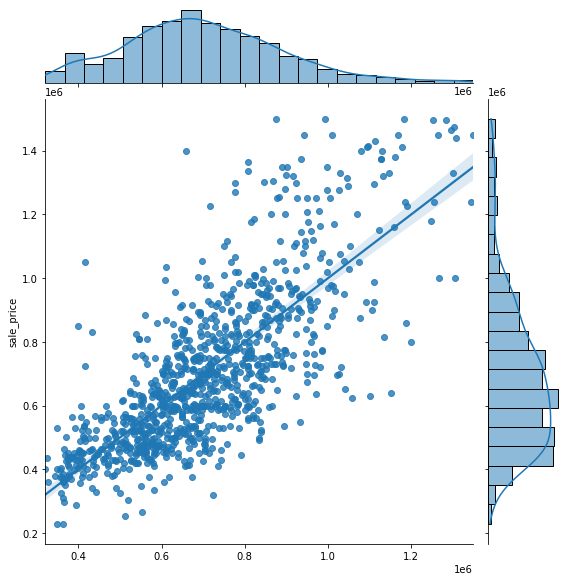

In [13]:
lm = LinearRegression()

lm.fit(X, y)
preds = lm.predict(X)

sns.jointplot(x=preds,y=y, kind='reg', height = 8);